# 4. Pre-Processing and Training Data

In [1]:
#Import required modules
import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.dates as mdates

from pathlib import Path

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Read Data

In [2]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01


In [11]:
#Define file name and location
dataset_csv = 'step3_eda_wti_price.csv'
path = '\\data\\interim\\'
f = ROOT_DIR + path + dataset_csv
print(f)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01\data\interim\crude_oil_price_step3_features.csv


In [12]:
#cast csv to dataframe
df = pd.read_csv(f)

#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)

#print shape of dataframe
print('Shape:',df.shape)

#display df head
display(df.head(7).round(2).T)

Shape: (274, 30)


Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01
wti_price,27.26,29.37,29.84,25.72,28.79,31.82,29.70
oil_production_opec,26.01,26.68,26.61,27.52,28.05,27.64,27.91
oil_production_nonopec,46.90,46.82,46.94,46.62,46.62,46.78,47.05
oil_production_world,73854.24,74470.54,74439.05,75116.13,75639.56,75360.22,75983.05
henry_hub_ng_price,2.42,2.66,2.79,3.04,3.59,4.29,3.99
oil_production_us,5.78,5.85,5.92,5.85,5.85,5.82,5.74
petrol_consumption_oecd,47.23,50.23,49.36,46.29,47.34,47.96,47.25
petrol_consumption_nonoecd,28.29,28.77,28.53,28.13,28.22,28.27,28.54
us_cpi,1.69,1.70,1.71,1.71,1.71,1.72,1.73
us_ppi,1.29,1.30,1.31,1.31,1.32,1.32,1.33


## Train/Test Split

In [13]:
#expected 70-30 split sizes
print(round(len(df) * 0.7, 0))
print(round(len(df) * 0.3, 0))

192.0
82.0


In [17]:
#split data to 70$ train and 30% test sets
#... = train_test_split(X, y, test_size, random_state)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='wti_price'),
                                                    df['wti_price'], test_size=0.3,
                                                    random_state=47)

In [18]:
print('(X_train, X_test):\n',X_train.shape, X_test.shape)
print('\n(y_train, y_test):\n',y_train.shape, y_test.shape)

(X_train, X_test):
 (191, 29) (83, 29)

(y_train, y_test):
 (191,) (83,)


## Initial Models

### Imputing missing feature (predictor) values
Impute missing values using scikit-learn. Learn values to impute from a train split and apply that to the test split.

### Impute missing values with median
There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

In [19]:
X_defaults_median = X_train.median()
X_defaults_median

oil_production_opec                   29.353000
oil_production_nonopec                54.879612
oil_production_world               87989.799073
henry_hub_ng_price                     3.830000
oil_production_us                      6.268391
petrol_consumption_oecd               47.249841
petrol_consumption_nonoecd            43.936055
us_cpi                                 2.283290
us_ppi                                 1.922921
us_ppi_petroleum                       1.977000
us_pmi                                99.182000
crude_oil_inventory_total           1076.810000
crude_oil_inventory_spr              688.605000
crude_oil_inventory_nonspr           342.318000
fed_fund_effective                     0.910000
global_real_econ_activity_index        0.654135
us_cpi_energy                        103.503290
eu19_ppi                               0.173310
usd_eur_exchange                       1.214600
global_econ_policy_uncert_index      125.952728
comp                                3003

In [20]:
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

### Scale Data

In [21]:
def scale_train_test_dataframes(X_tr, X_te):
    '''This function gets a dataframe and normalized columns and return a new data frame'''
    
    #store column names
    names = X_tr.columns
    
    from sklearn.preprocessing import StandardScaler

    #Call the StandardScaler`s fit method on `X_tr` to fit the scaler
    #then use it's `transform()` method to apply the scaling to both the train and test split
    #data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively

    scaler = StandardScaler()
    
    #scale data using sklearn preprocessing module
    scaler.fit(X_tr)
    
    X_tr_scaled = scaler.transform(X_tr)
    
    X_te_scaled = scaler.transform(X_te)

    #create new df using scaled data
    X_tr_scaled_df = pd.DataFrame(X_tr_scaled, columns=names)
    X_te_scaled_df = pd.DataFrame(X_te_scaled, columns=names)

    #set index
    X_tr_scaled_df.set_index(X_tr.index, drop=True, inplace=True)
    X_te_scaled_df.set_index(X_te.index, drop=True, inplace=True)

    #return scaled dataframe
    return X_tr_scaled_df, X_te_scaled_df

In [22]:
X_tr_scaled, X_te_scaled = scale_train_test_dataframes(X_tr, X_te)

#### Plot scaled data

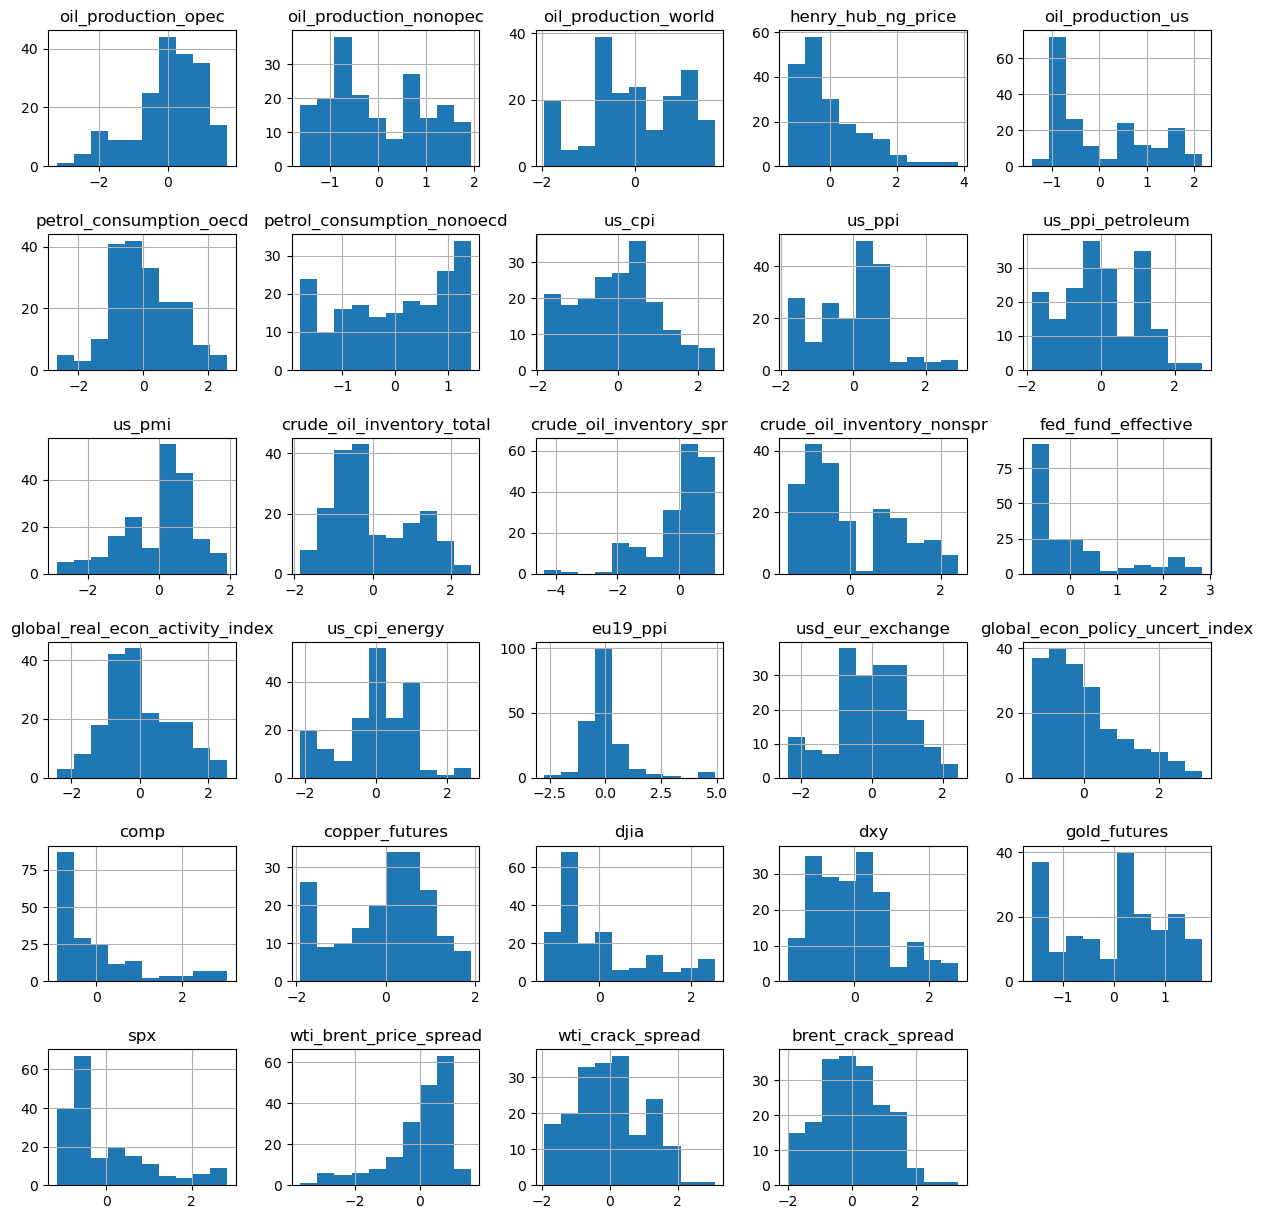

In [23]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
X_tr_scaled.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:>

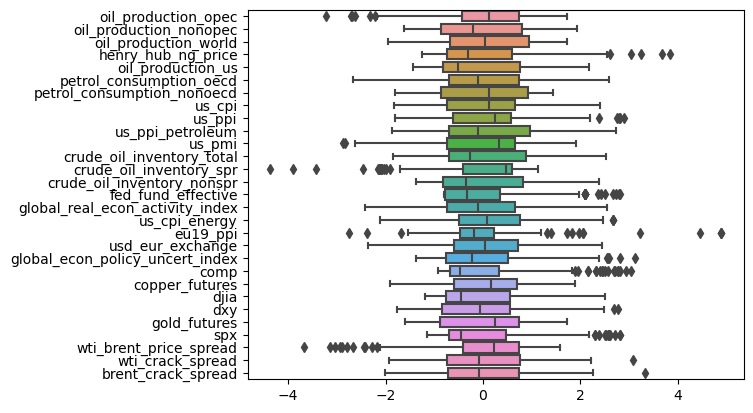

In [24]:
sns.boxplot(data = X_tr_scaled, orient = 'h')

## Conduct Regression Model in PyCaret

In [29]:
from pycaret.regression import *

# Transform dataset (transform, bin and create dummy variables) and split the dataset.
#In addition, we are logging experiments and plots for those experiment to be viewed later with MLflow. 

reg_model = setup(data=df, 
                target='wti_price',
                session_id=786,
                transformation=True,
                normalize=True,
                train_size=0.7,
                log_plots=True)

,Description,Value
0,Session id,786
1,Target,wti_price
2,Target type,Regression
3,Data shape,"(274, 30)"
4,Train data shape,"(191, 30)"
5,Test data shape,"(83, 30)"
6,Numeric features,29
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [30]:
# We can do a compare_models() function without assigning it to a variable.
# However, we have top 5 models selected using n_select and assigning it to top5 variable.
# We plan to use this for Stacking and Blending purposes. 
# We have have adjusted the default fold value from 10 to 5.

top5 = compare_models(n_select=5, sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.0546,16.8744,4.0825,0.9758,0.0734,0.0548,0.0720
lr,Linear Regression,3.4466,19.5710,4.4010,0.9714,0.0844,0.0631,1.2540
br,Bayesian Ridge,3.6187,20.9058,4.5582,0.9697,0.0926,0.0673,0.0220
huber,Huber Regressor,3.5712,21.3203,4.6094,0.9691,0.0870,0.0655,0.0240
ridge,Ridge Regression,3.7401,22.1869,4.6912,0.9679,0.0995,0.0703,0.0160
gbr,Gradient Boosting Regressor,3.5553,24.5352,4.8646,0.9651,0.0819,0.0616,0.0500
lightgbm,Light Gradient Boosting Machine,3.7113,26.7049,5.0821,0.9619,0.0862,0.0660,0.0300
rf,Random Forest Regressor,3.8661,27.8304,5.1815,0.9603,0.0870,0.0678,0.1000
lasso,Lasso Regression,4.2581,30.4925,5.4668,0.9567,0.1012,0.0771,0.5420
omp,Orthogonal Matching Pursuit,4.4642,32.7896,5.7073,0.9529,0.1051,0.0793,0.0200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [31]:
# We can tune our top 5 models dynamically with a higher iteration rate (n_iter)
#to find more optimal hyper parameters over a larger search space. 

tuned_top5 = [tune_model(i, n_iter=120, optimize='RMSE', fold=5) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8036,23.7761,4.8761,0.9680,0.0761,0.0628
1,3.4404,20.5386,4.5320,0.9677,0.1222,0.0746
2,3.2970,22.8453,4.7797,0.9711,0.0564,0.0469
3,2.6648,10.7091,3.2725,0.9838,0.0805,0.0647
4,3.1102,18.1286,4.2578,0.9723,0.0553,0.0457
Mean,3.2632,19.1995,4.3436,0.9726,0.0781,0.0590
Std,0.3758,4.6747,0.5769,0.0059,0.0243,0.0111


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3239,17.7944,4.2183,0.9760,0.0649,0.0548
1,3.6719,20.9266,4.5746,0.9671,0.1136,0.0723
2,3.0164,15.0346,3.8775,0.9810,0.0663,0.0534
3,3.0820,17.2340,4.1514,0.9740,0.0926,0.0657
4,4.1388,26.8654,5.1832,0.9589,0.0848,0.0695
Mean,3.4466,19.5710,4.4010,0.9714,0.0844,0.0631
Std,0.4155,4.1047,0.4498,0.0077,0.0180,0.0077


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9171,22.9350,4.7890,0.9691,0.0719,0.0633
1,4.2179,26.4130,5.1394,0.9585,0.1305,0.0822
2,3.2807,18.4807,4.2989,0.9766,0.0776,0.0582
3,3.1455,17.3137,4.1610,0.9739,0.1110,0.0735
4,3.5285,19.3474,4.3986,0.9704,0.0716,0.0591
Mean,3.6179,20.8980,4.5574,0.9697,0.0925,0.0673
Std,0.3986,3.3365,0.3582,0.0062,0.0240,0.0093


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7948,21.6731,4.6554,0.9708,0.0716,0.0620
1,3.9723,23.7531,4.8737,0.9626,0.1187,0.0753
2,3.3058,18.5545,4.3075,0.9765,0.0753,0.0584
3,3.1354,17.2371,4.1518,0.9740,0.1020,0.0717
4,3.6152,19.8362,4.4538,0.9696,0.0719,0.0600
Mean,3.5647,20.2108,4.4884,0.9707,0.0879,0.0655
Std,0.3076,2.2984,0.2544,0.0047,0.0191,0.0067


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4466,18.8313,4.3395,0.9746,0.0668,0.0565
1,3.7858,22.2285,4.7147,0.9650,0.1154,0.0742
2,3.0344,15.7172,3.9645,0.9801,0.0683,0.0541
3,2.9726,17.0048,4.1237,0.9743,0.0949,0.0659
4,3.9095,22.8517,4.7803,0.9650,0.0784,0.0659
Mean,3.4298,19.3267,4.3845,0.9718,0.0848,0.0633
Std,0.3802,2.8111,0.3201,0.0059,0.0183,0.0073


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [32]:
# Blending models is an ensemble method of combining different machine learning algorithms and use a majority vote to build consensus of final prediction values. Let's try building a blending model from our top 5 models and evaluate the results. 
blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3508,17.3266,4.1625,0.9767,0.0650,0.0552
1,3.4368,17.9605,4.2380,0.9718,0.1005,0.0689
2,2.8283,14.3857,3.7929,0.9818,0.0607,0.0485
3,2.5611,11.9882,3.4624,0.9819,0.0816,0.0583
4,3.2778,17.6419,4.2002,0.9730,0.0649,0.0534
Mean,3.0910,15.8606,3.9712,0.9770,0.0745,0.0569
Std,0.3382,2.3196,0.3003,0.0043,0.0148,0.0068


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [33]:
# Below is a view of the model parameters. 
print(blender_specific)
display(blender_specific)

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=786)),
                            ('Linear Regression', LinearRegression(n_jobs=-1)),
                            ('Bayesian Ridge',
                             BayesianRidge(alpha_1=0.3, alpha_2=0.001,
                                           compute_score=True, lambda_1=0.0005,
                                           lambda_2=0.2, normalize=False)),
                            ('Huber Regressor',
                             HuberRegressor(alpha=0.05, epsilon=1.9)),
                            ('Ridge Regression',
                             Ridge(alpha=0.02, normalize=False,
                                   random_state=786))],
                n_jobs=-1)


VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=786)),
                            ('Linear Regression', LinearRegression(n_jobs=-1)),
                            ('Bayesian Ridge',
                             BayesianRidge(alpha_1=0.3, alpha_2=0.001,
                                           compute_score=True, lambda_1=0.0005,
                                           lambda_2=0.2, normalize=False)),
                            ('Huber Regressor',
                             HuberRegressor(alpha=0.05, epsilon=1.9)),
                            ('Ridge Regression',
                             Ridge(alpha=0.02, normalize=False,
                                   random_state=786))],
                n_jobs=-1)

In [34]:
# Stacking models is an ensemble method of using meta learning, 
#where a meta model is created using multiple base estimators to generate the final prediction.
#Let's try building a stacking model from our top 5 models and evaluate the results.

stacker_specific = stack_models(estimator_list=tuned_top5[1:],
                                meta_model=tuned_top5[0],
                                fold=5,
                                optimize='RMSE',
                                choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6218,9.4839,3.0796,0.9872,0.0551,0.0473
1,2.7043,14.9206,3.8627,0.9765,0.1038,0.0595
2,2.6881,14.1326,3.7593,0.9821,0.0508,0.0412
3,2.9655,15.3347,3.9160,0.9769,0.0755,0.0625
4,2.8693,14.8942,3.8593,0.9772,0.0513,0.0431
Mean,2.7698,13.7532,3.6954,0.9800,0.0673,0.0507
Std,0.1273,2.1696,0.3120,0.0042,0.0204,0.0087


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [35]:
# Below is a view of the model parameters. 
print(stacker_specific)
display(stacker_specific)

StackingRegressor(cv=5,
                  estimators=[('Linear Regression',
                               LinearRegression(n_jobs=-1)),
                              ('Bayesian Ridge',
                               BayesianRidge(alpha_1=0.3, alpha_2=0.001,
                                             compute_score=True,
                                             lambda_1=0.0005, lambda_2=0.2,
                                             normalize=False)),
                              ('Huber Regressor',
                               HuberRegressor(alpha=0.05, epsilon=1.9)),
                              ('Ridge Regression',
                               Ridge(alpha=0.02, normalize=False,
                                     random_state=786))],
                  final_estimator=ExtraTreesRegressor(n_jobs=-1,
                                                      random_state=786),
                  n_jobs=-1, passthrough=True)


StackingRegressor(cv=5,
                  estimators=[('Linear Regression',
                               LinearRegression(n_jobs=-1)),
                              ('Bayesian Ridge',
                               BayesianRidge(alpha_1=0.3, alpha_2=0.001,
                                             compute_score=True,
                                             lambda_1=0.0005, lambda_2=0.2,
                                             normalize=False)),
                              ('Huber Regressor',
                               HuberRegressor(alpha=0.05, epsilon=1.9)),
                              ('Ridge Regression',
                               Ridge(alpha=0.02, normalize=False,
                                     random_state=786))],
                  final_estimator=ExtraTreesRegressor(n_jobs=-1,
                                                      random_state=786),
                  n_jobs=-1, passthrough=True)

In [36]:
evaluate_model(stacker_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
evaluate_model(blender_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

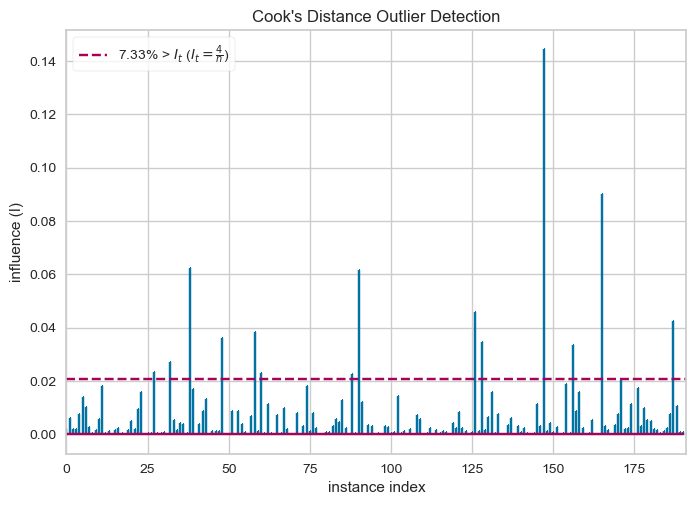

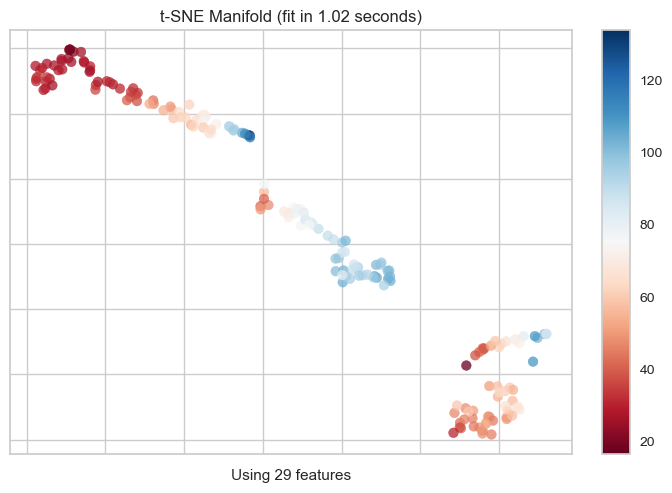

In [38]:
# We can use Pycaret's built in plot_model() function to generate side-by-side plots: 
#the Cook's Distance Outliers and t-SNE Manifold charts. 
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(5,2,1)
plot_model(blender_specific, plot='cooks')
ax = fig.add_subplot(5,2,2)
plot_model(blender_specific, plot='manifold')
plt.show()

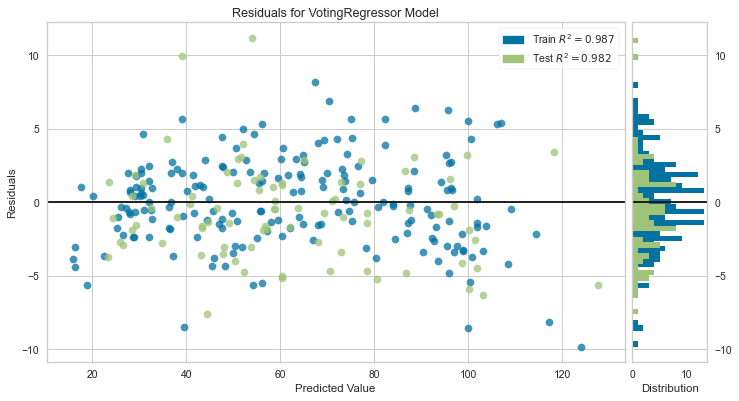

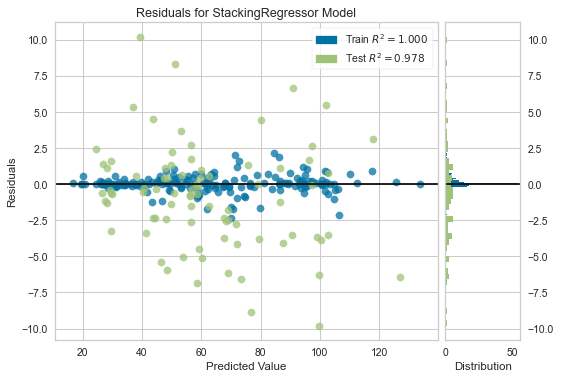

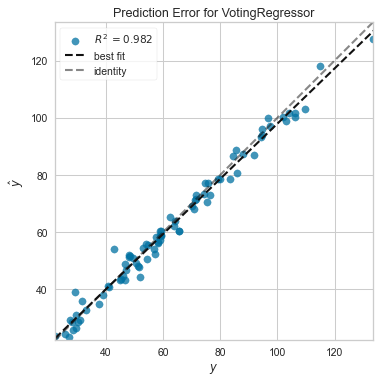

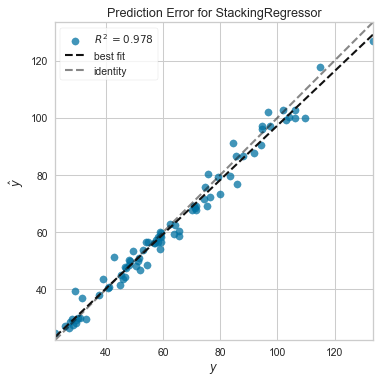

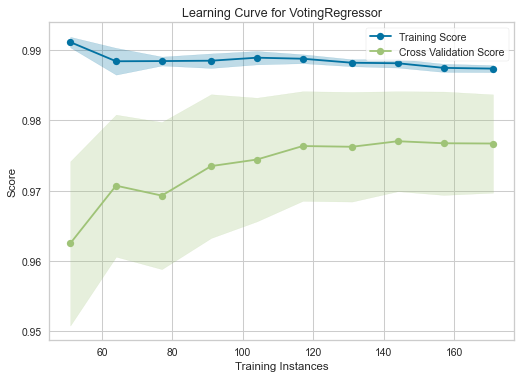

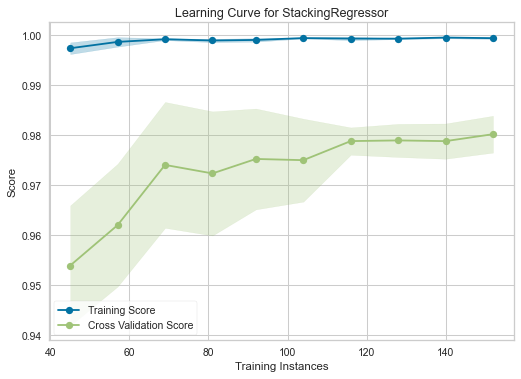

In [39]:
# We can use Pycaret's built in plot_model() function to generate side-by-side plots:
#the Residuals chart, Prediction Error and Cross Validation (learning) charts.
#Let's compare the Blend and Stack model plots in a side-by-side comparison. 

fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(3,2,1)
plot_model(blender_specific, plot='residuals', save=False, verbose=False, scale=0.75)
ax = fig.add_subplot(3,2,2)
plot_model(stacker_specific, plot='residuals', save=False, verbose=False, scale=0.75)
ax = fig.add_subplot(3,2,3)
plot_model(blender_specific, plot='error', save=False, verbose=False, scale=0.75)
ax = fig.add_subplot(3,2,4)
plot_model(stacker_specific, plot='error', save=False, verbose=False, scale=0.75)
ax = fig.add_subplot(3,2,5)
plot_model(blender_specific, plot='learning', verbose=False, scale=0.75)
ax = fig.add_subplot(3,2,6)
plot_model(stacker_specific, plot='learning', save=False, verbose=False, scale=0.75)
#plt.savefig('plots_blender_vs_stacker.png', dpi=300, pad_inches=0.25)
plt.show()

In [40]:
# We can execute the predict_model() function to use the model to generate the predicted values. 
pred_tunded_blender = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.5214,10.7404,3.2773,0.9823,0.0644,0.0468


In [41]:
# We can execute the predict_model() function to use the model to generate the predicted values. 
pred_tunded_stacker = predict_model(stacker_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.7650,13.3672,3.6561,0.9779,0.0642,0.0477


In [42]:
# The Blend model seems to perform better in both our train and test so let us finalize it.
#The finalize_model() function trains the model on the entire dataset. 

finalize_blender = finalize_model(blender_specific)
display(finalize_blender)

Pipeline(memory=Memory(location=C:\Users\Farid\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['oil_production_opec',
                                             'oil_production_nonopec',
                                             'oil_production_world',
                                             'henry_hub_ng_price',
                                             'oil_production_us',
                                             'petrol_consumption_oecd',
                                             'petrol_consumption_nonoecd',
                                             'us_cpi', 'us_ppi',
                                             'us_ppi_petroleum', 'us_pmi',
                                             'crude_o...
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=786)),
                                             ('Linear Regression',
                                              LinearRegression(n_jobs=-1)),
                                             ('Bayesian Ridge',
                                              BayesianRidge(alpha_1=0.3,
                                                            alpha_2=0.001,
                                                            compute_score=True,
                                                            lambda_1=0.0005,
                                                            lambda_2=0.2,
                                                            normalize=False)),
                                             ('Huber Regressor',
                                              HuberRegressor(alpha=0.05,
                                                             epsilon=1.9)),
                                             ('Ridge Regression',
                                              Ridge(alpha=0.02, normalize=False,
                                                    random_state=786))],
                                 n_jobs=-1))])

## Analyze the Performance of Final Model on Entire Dataset

In [43]:
# The predict_model() can be executed with the final blend model over the entire dataset and saved to a csv file. 
pred_final_blender = predict_model(finalize_blender, data=df)
pred_final_blender.to_csv('pred_final_blender.csv')
pred_final_blender.describe().T

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.3217,8.9394,2.9899,0.9868,0.0582,0.0428


,count,mean,std,min,25%,50%,75%,max
oil_production_opec,274.0,-4.698760e-08,1.001830,-2.334526,-0.594762,-0.012492,0.677924,2.288872
oil_production_nonopec,274.0,-2.827958e-08,1.001830,-1.762123,-0.785919,-0.096563,0.884650,1.702057
oil_production_world,274.0,-4.785774e-08,1.001830,-1.808752,-0.618583,-0.151692,0.979168,1.758801
henry_hub_ng_price,274.0,-7.178662e-09,1.001830,-2.257959,-0.782844,-0.013970,0.835175,2.313580
oil_production_us,274.0,9.397521e-08,1.001830,-2.478289,-0.834801,-0.518136,0.973726,1.606722
petrol_consumption_oecd,274.0,-1.812068e-07,1.001830,-3.646358,-0.638454,-0.110004,0.618481,2.900374
petrol_consumption_nonoecd,274.0,1.392225e-08,1.001830,-1.616755,-0.947520,0.067807,0.961110,1.527028
us_cpi,274.0,8.527380e-08,1.001830,-1.823680,-0.777678,0.116864,0.715857,2.268079
us_ppi,274.0,-1.305211e-07,1.001830,-1.763154,-0.637466,0.230175,0.647277,2.709055
us_ppi_petroleum,274.0,6.090985e-08,1.001830,-2.037925,-0.749056,0.048735,0.762324,2.694850


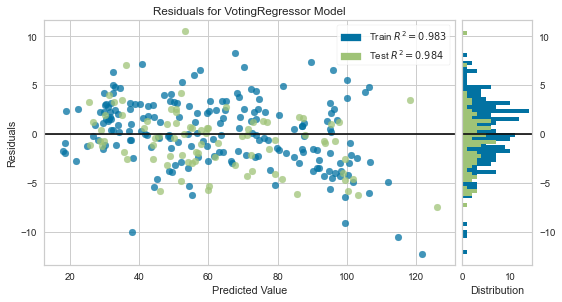

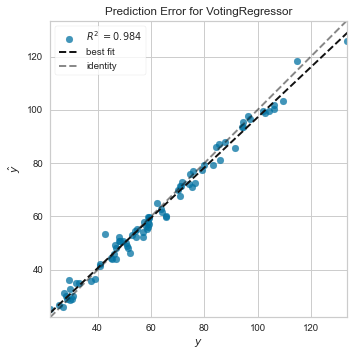

In [44]:
# We can use the Pycaret's built-in plot_model() function to generate Residuals and Error plots for the finalized blend model. 
fig = plt.figure(figsize=(9,10))
ax = fig.add_subplot(2,1,1)
plot_model(finalize_blender, plot='residuals', save=False, verbose=False, scale=0.7)
ax = fig.add_subplot(2,1,2)
plot_model(finalize_blender, plot='error', save=False, verbose=False, scale=0.7)
plt.show()

In [ ]:
# An interesting view is looking at the Actual Values and Predicted Values (Label) in 
#a histogram over the entire dataset. This shows the distribution between the values.
#We can see how the Predicted Values seem to peak in a more distributed manner and skew to the left. 

plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.distplot(pred_final_blender["wti_price"],
                bins=20,
                kde=False,
                color="#c6690c")
sns.distplot(pred_final_blender["prediction_label"],
                bins=20,
                kde=False,
                color="#664697")
plt.title("Distribution between Actual Value and Predicted Value (Label)")
plt.ylabel("Count")
plt.xlabel("FCR Value")
plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)
plt.show()

In [ ]:
# We can plot the Predicted Value (Label) and Actual Value over the entire dataset. 
sns.regplot(x="wti_price", y="prediction_label",
            data=pred_final_blender, lowess=False, 
            scatter_kws ={'s':50}, 
            line_kws={"color": "#664697"},
            color="#c6690c")

plt.title("Linear Relationship between Actual Value and Predicted Value (Label)")
plt.ylabel("Predicted Value (Label)")
plt.xlabel("Actual Value")
plt.legend(('Best Fit', 'Actual Value vs Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)
plt.show()

In [ ]:
# We can compare the Predicted Values (Label) and Residuals in an error plot over the entire dataset. 
sns.residplot(x="wti_price", y="prediction_label",
              data=pred_final_blender, lowess=False,
              scatter_kws ={'s':50},
              line_kws={"color": "#664697"},
              color="#c6690c")

plt.title("Residuals for the Predicted values in Final Blend Model")
plt.ylabel("Residuals")
plt.xlabel("Predicted Value (Label)")
#plt.xlim((74,101))
plt.legend(('Best Fit', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

In [ ]:
# Sometimes you want to include the output of the compare_models() as a screenshot into a report. However, with the yellow highlights it gets difficult to read. Pycaret has thought of that and you can use the pull() function to show the model results in the sort by or ascending order.
pull().sort_values(by='RMSE', ascending=True)

In [ ]:
# Below is a list of models that Pycaret can use for regression. The ID for each regression can be used to include or exclude models for various functions.
models()